# Setting Up

### Moving to the project's base folder

In [1]:
%cd ./drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


# Utils

In [2]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')
from my_utils import results_utils

# Experiments with embeddings options

## Import data

In [3]:
import pickle

encodings_list = ['FT1', 'FT2', 'FT3','W2V300','GloVe300']
results_list = []
for encoding in encodings_list:

  with open(f'./Results/SNN/{encoding}_embeddings_experiments.df', 'rb') as filehandle:
        # store the encoded documents as binary data
        encoding_results = pickle.load(filehandle)

  encoding_results['encoding'] = encoding

  results_list.append(encoding_results)

In [4]:
from pandas import DataFrame
import pandas as pd
merged_search_results = pd.DataFrame()

for search_results in results_list:
  merged_search_results = pd.concat([merged_search_results, search_results])

merged_search_results.shape 

(1080, 17)

## Analisys by encoding type

In [5]:
encodings_list = ['FT1', 'FT2', 'FT3','W2V300','GloVe300']

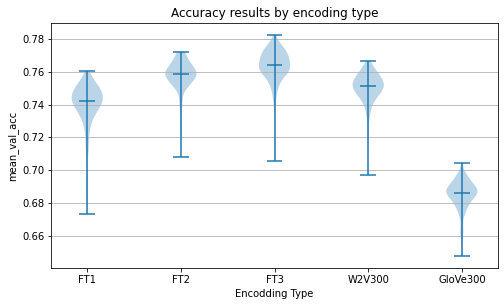

In [6]:
#source: https://matplotlib.org/3.3.3/gallery/statistics/boxplot_vs_violin.html#sphx-glr-gallery-statistics-boxplot-vs-violin-py
import matplotlib.pyplot as plt
import numpy as np

y_max = merged_search_results['val_acc_A'].max()+.007
y_min = merged_search_results['val_acc_A'].min()-.007
y_limits = [y_min, y_max]

x_labels = encodings_list
n_labels = len(x_labels)

acc_data = [search_results['val_acc_A'].array for search_results in results_list]
x_positions = [(y + 1) * 1.5 for y in range(n_labels)]

fig, axs = plt.subplots(nrows=1, ncols=1, sharey = False, figsize=(8, 4.5))

axs.violinplot(acc_data,
               positions = x_positions,
               showmeans=False,
               showmedians=True)
axs.set_title('Accuracy results by encoding type')
axs.set_ylim(*y_limits)

axs.yaxis.grid(True)
axs.set_xticks(x_positions)
axs.set_xlabel('Encodding Type')
axs.set_ylabel('mean_val_acc')

# add x-tick labels
plt.setp(axs, xticks=x_positions,xticklabels=x_labels)
plt.show()

## Analysis by parameter

(This analysis is limited to the models using the FT3 embeddings)

In [ ]:
arch_params_dict = {
    'L1_size': [300, 200],                    
    'L2_size': [150, 100, 75],                
    'activation':['relu'],                                    
    'p_dropout_1':[0, 0.5],
    'p_dropout_2':[0, 0.5]                                
}

trainig_params_dict = {'optimizer':['adam-1e-3', 'adam-5e-4', 'adam-1e-4', 'rmsprop-1e-3', 'rmsprop-5e-4', 'rmsprop-1e-4'],
                       'batch_size':[256,512,1024],
                       'max_epochs':[75]}
                        

In [ ]:
params_dict = {'optimizer':['adam-1e-3', 'adam-5e-4', 'adam-1e-4', 
                            'rmsprop-1e-3', 'rmsprop-5e-4', 'rmsprop-1e-4']                                
}

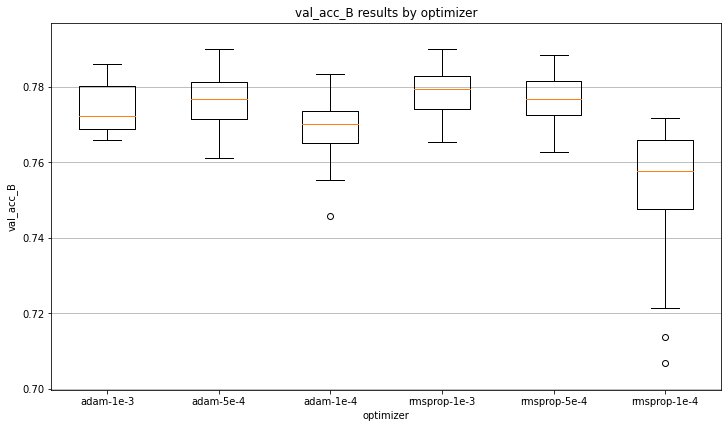

In [ ]:
results_utils.plotResultsByParameter1(results_list[0], 
                       params_dict, 
                       params2plot=['optimizer'],
                       metric='val_acc_B')

# Experiments with scaling options

## Import data

In [ ]:
import pickle

scaling_options = ['STANDARD','MIN-MAX','NULL']
results_list = []
for scaling in scaling_options:

  with open('./Results/SNN/SNN_BROAD_SEARCH_{}_SCALING.df'.format(scaling), 'rb') as filehandle:
        # store the encoded documents as binary data
        scaling_results = pickle.load(filehandle)

  scaling_results['scaling'] = scaling

  results_list.append(scaling_results[:50])

In [ ]:
from pandas import DataFrame
import pandas as pd
merged_search_results = pd.DataFrame()

for search_results in results_list:
  merged_search_results = pd.concat([merged_search_results, search_results])

merged_search_results.shape 

(150, 15)

## Analisys by scaling method

In [ ]:
scaling_options = ['STANDARD','MIN-MAX','NULL']

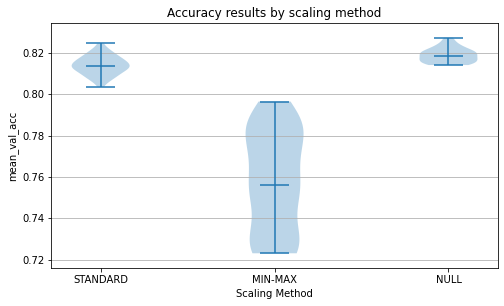

In [ ]:
#source: https://matplotlib.org/3.3.3/gallery/statistics/boxplot_vs_violin.html#sphx-glr-gallery-statistics-boxplot-vs-violin-py
import matplotlib.pyplot as plt
import numpy as np

y_max = merged_search_results['mean_val_acc'].max()+.007
y_min = merged_search_results['mean_val_acc'].min()-.007
y_limits = [y_min, y_max]

x_labels = scaling_options
n_labels = len(x_labels)

acc_data = [search_results['mean_val_acc'].array for search_results in results_list]
x_positions = [(y + 1) * 1.5 for y in range(n_labels)]

fig, axs = plt.subplots(nrows=1, ncols=1, sharey = False, figsize=(8, 4.5))

axs.violinplot(acc_data,
               positions = x_positions,
               showmeans=False,
               showmedians=True)
axs.set_title('Accuracy results by scaling method')
axs.set_ylim(*y_limits)

axs.yaxis.grid(True)
axs.set_xticks(x_positions)
axs.set_xlabel('Scaling Method')
axs.set_ylabel('mean_val_acc')

# add x-tick labels
plt.setp(axs, xticks=x_positions,xticklabels=x_labels)
plt.show()

# Task A Experiments

## Search 1

### Hiperparameters dictionary

In [ ]:
from itertools import product

params_dict = {
    'L1_size': [400, 300, 200, 150],                    
    'L2_size': [300, 250, 200, 150, 125, 100],                
    'activation':['relu'],    
    'p_dropout_1': [0, 0.2, 0.4, 0.6, 0.8],     
    'p_dropout_2': [0, 0.2, 0.4, 0.6],                 
    'batch_size': [64, 128, 256, 512],                 
    'optimizer':['rmsprop']                                    
}

### Results

In [ ]:
import pickle

with open('./Results/SNN/SNN_TASK_HS_EXTENDED_DATASET_SEARCH_1.df', 'rb') as filehandle:
  # store the encoded documents as binary data
  search_results = pickle.load(filehandle)

search_results.shape  

(200, 24)

**Resultados ordenados por exactitud media y sobreajuste**

In [ ]:
sorted_results = sort_results(search_results, min_val_acc=0.0, trade_factor=10)
sorted_results.head(10)

,L1_size,L2_size,activation,p_dropout_1,p_dropout_2,batch_size,optimizer,acc_k-0,acc_k-1,acc_k-2,acc_k-3,val_acc_k-0,val_acc_k-1,val_acc_k-2,val_acc_k-3,total_epochs,max_epochs2best,min_epochs2best,mean_loss,mean_val_loss,mean_acc,mean_val_acc,mean_final_acc,mean_final_val_acc
128,300,100,relu,0.2,0.4,512,rmsprop,0.871179,0.840644,0.846477,0.828511,0.800000,0.809524,0.819328,0.812325,75.0,44,32,0.348842,0.475766,0.846703,0.810294,0.932159,0.786213
109,400,200,relu,0.0,0.2,256,rmsprop,0.860210,0.902707,0.998367,0.833178,0.805594,0.810924,0.815126,0.824930,75.0,57,15,0.240982,0.565357,0.898615,0.814144,0.975430,0.787898
192,400,150,relu,0.0,0.6,512,rmsprop,0.846908,0.898273,0.876108,0.886374,0.795804,0.817927,0.815126,0.819328,75.0,63,34,0.298545,0.523692,0.876916,0.812046,0.939124,0.763744
74,300,100,relu,0.6,0.6,256,rmsprop,0.873046,0.826878,0.857910,0.872842,0.783217,0.813725,0.822129,0.810924,75.0,50,33,0.328668,0.482890,0.857669,0.807499,0.909981,0.783693
51,400,125,relu,0.4,0.6,128,rmsprop,0.866978,0.876808,0.798413,0.831778,0.788811,0.819328,0.808123,0.808123,75.0,33,19,0.351410,0.509340,0.843494,0.806096,0.955294,0.779425
23,300,125,relu,0.6,0.6,128,rmsprop,0.918553,0.841577,0.921139,0.849510,0.786014,0.816527,0.816527,0.819328,75.0,73,34,0.278197,0.542902,0.882695,0.809599,0.919232,0.789926
154,400,100,relu,0.2,0.2,64,rmsprop,0.867445,0.912506,0.867942,0.944237,0.791608,0.819328,0.815126,0.815126,75.0,35,19,0.246296,0.656853,0.898032,0.810297,0.980132,0.777040
39,400,125,relu,0.2,0.2,256,rmsprop,0.924387,0.889407,0.935604,0.928605,0.787413,0.820728,0.820728,0.819328,75.0,41,33,0.201962,0.563922,0.919501,0.812049,0.975699,0.770600
43,300,250,relu,0.6,0.6,64,rmsprop,0.914819,0.829445,0.851843,0.829211,0.781818,0.816527,0.815126,0.810924,75.0,58,25,0.333069,0.531818,0.856330,0.806099,0.924237,0.779074
178,200,100,relu,0.4,0.4,512,rmsprop,0.877713,0.885908,0.899673,0.810779,0.786014,0.805322,0.817927,0.819328,75.0,69,26,0.307830,0.510565,0.868518,0.807148,0.923409,0.778092


In [ ]:
results_subset = search_results.loc[search_results['p_dropout_1']==search_results['p_dropout_2']]
results_subset.shape

(89, 24)

## Analysis by parameter

### Results by L1_size

In [ ]:
plotResultsByParameter(search_results, params_dict, params2plot=['L1_size'])

### Results by parameter for models where L1_size==400

In [ ]:
results_subset = search_results.loc[search_results['L1_size'].isin([400])]

sorted_results_2 = sort_results(results_subset, min_val_acc=0.0, trade_factor=10)
sorted_results_2.head(3)

,L1_size,L2_size,activation,p_dropout_1,p_dropout_2,batch_size,optimizer,max_epochs2best,min_epochs2best,mean_loss,mean_val_loss,mean_acc,mean_val_acc,mean_final_acc,mean_final_val_acc
106,400,125,relu,0.2,0.5,512,rmsprop,53,26,0.352854,0.468225,0.83885,0.8200,0.90962,0.77944
119,400,300,relu,0.4,0.4,128,rmsprop,35,12,0.337069,0.483005,0.84975,0.8204,0.95526,0.79288
25,400,150,relu,0.0,0.6,512,rmsprop,53,25,0.324052,0.488312,0.85585,0.8208,0.91891,0.77240


In [ ]:
sorted_results_2.head(20)['L2_size'].value_counts()

In [ ]:
sorted_results_2.head(20)['p_dropout_1'].value_counts()

In [ ]:
sorted_results_2.head(20)['p_dropout_2'].value_counts()

In [ ]:
sorted_results_2.head(20)['batch_size'].value_counts()

512    9
256    6
128    3
64     2
Name: batch_size, dtype: int64

## Graphic analysis

In [ ]:
plotResultsByParameter(results_subset, params_dict, params2plot=['L2_size', 
                                                                 'p_dropout_1', 
                                                                 'p_dropout_2', 
                                                                 'batch_size'])

**Best results were found where:**


*   'L1_size' = 400
*   'L2_size' > 100
*   'p_drop_2' = [0.2,0.4,0.6]
* 'batch_size' = [256, 512]



# Refined Search 1

In [ ]:
files_list = ['./Results/SNN/SNN_SEARCH_2_DD_TESTING_1.df',
              './Results/SNN/SNN_SEARCH_2_DD_TESTING_2.df',
              './Results/SNN/SNN_SEARCH_2_DD_TESTING_3.df',
              './Results/SNN/SNN_SEARCH_2_DD_TESTING_4.df']

merged = merge_data_frames(files_list, './Results/SNN/SNN_SEARCH_2_DD_TESTING_COMPLETE.df')

## Hiperparameters dictionary

In [ ]:
params_dict = {
    'L1_size': [450, 400, 350],                    
    'L2_size': [300, 250, 200, 150, 125],                
    'activation':['relu'],                                    
    'p_dropout_1': [0, 0.2, 0.4, 0.6],  
    'p_dropout_2': [0.4, 0.5, 0.6],                 
    'batch_size': [256, 512],                 
    'optimizer':['rmsprop']                                    
}


## Results

In [ ]:
import pickle

with open('./Results/SNN/SNN_SEARCH_2_DD_TESTING_COMPLETE.df', 'rb') as filehandle:
  search_results = pickle.load(filehandle)

search_results.shape

(90, 15)

**Results sorted by *'mean_val_acc'* ad *'overffitting'***

In [ ]:
sorted_results = sort_results(search_results, min_val_acc=0.0, trade_factor=10)
sorted_results.head(3)

,L1_size,L2_size,activation,p_dropout_1,p_dropout_2,batch_size,optimizer,max_epochs2best,min_epochs2best,mean_loss,mean_val_loss,mean_acc,mean_val_acc,mean_final_acc,mean_final_val_acc
6,450,150,relu,0.4,0.6,256,rmsprop,59,19,0.316350,0.504266,0.8581,0.8220,0.95345,0.78224
27,400,200,relu,0.4,0.4,512,rmsprop,62,21,0.324406,0.475290,0.8548,0.8212,0.93699,0.77360
83,400,250,relu,0.4,0.6,512,rmsprop,68,23,0.345127,0.490558,0.8568,0.8212,0.93457,0.78632


In [ ]:
sorted_results.loc[:,:'batch_size'].head(5).values.tolist()

[[450, 150, 'relu', 0.4, 0.6, 256],
 [400, 200, 'relu', 0.4, 0.4, 512],
 [400, 250, 'relu', 0.4, 0.6, 512],
 [350, 125, 'relu', 0.2, 0.6, 512],
 [400, 200, 'relu', 0.6, 0.6, 512]]

# Refined Search 2

## Results

In [ ]:
import pickle

with open('./Results/SNN/SNN_SEARCH_3_DD_TESTING_COMPLETE.df', 'rb') as filehandle:
  search_results = pickle.load(filehandle)

search_results.shape

(5, 14)

**Results sorted by *'mean_val_acc'* ad *'overffitting'***

In [ ]:
sorted_results = sort_results(search_results, min_val_acc=0.0, trade_factor=10)
sorted_results.head()

,L1_size,L2_size,activation,p_dropout_1,p_dropout_2,batch_size,max_epochs2best,min_epochs2best,mean_loss,mean_val_loss,mean_acc,mean_val_acc,mean_final_acc,mean_final_val_acc
2,350,125,relu,0.2,0.6,512,68,26,0.266024,0.550236,0.888833,0.812667,0.931444,0.778800
0,450,150,relu,0.4,0.6,256,64,27,0.248294,0.585293,0.893556,0.812000,0.949889,0.780400
4,400,200,relu,0.6,0.6,512,61,16,0.353702,0.485541,0.842167,0.805111,0.903839,0.778178
1,400,200,relu,0.4,0.4,512,68,36,0.215220,0.571032,0.912361,0.809556,0.935117,0.779378
3,400,250,relu,0.4,0.6,512,59,25,0.268281,0.530386,0.887556,0.805111,0.935717,0.775156


# Task B1

# Search 1

In [ ]:
files_list = ['./Results/SNN/SNN_TASK_B1_SEARCH_1_1.df',
              './Results/SNN/SNN_TASK_B1_SEARCH_1_2.df',
              './Results/SNN/SNN_TASK_B1_SEARCH_1_3.df']

merged = merge_data_frames(files_list, './Results/SNN/SNN_TASK_B1_SEARCH_1_COMPLETE.df')

## Results

In [ ]:
import pickle

with open('./Results/SNN/SNN_TASK_B1_SEARCH_1_COMPLETE.df', 'rb') as filehandle:
  search_results = pickle.load(filehandle)

search_results.shape

(100, 15)

**Results sorted by *'mean_val_acc'* ad *'overffitting'***

In [ ]:
sorted_results = sort_results(search_results, min_val_acc=0.0, trade_factor=10)
sorted_results.head()

,L1_size,L2_size,activation,p_dropout_1,p_dropout_2,batch_size,optimizer,max_epochs2best,min_epochs2best,mean_loss,mean_val_loss,mean_acc,mean_val_acc,mean_final_acc,mean_final_val_acc
47,350,300,relu,0.4,0.6,256,rmsprop,66,15,0.170495,0.427301,0.93065,0.9028,0.97808,0.87920
65,450,200,relu,0.2,0.5,512,rmsprop,47,19,0.212004,0.321732,0.90865,0.8996,0.97422,0.86336
68,450,150,relu,0.0,0.5,512,rmsprop,63,19,0.234233,0.357340,0.91040,0.8988,0.96996,0.87768
56,450,200,relu,0.6,0.6,256,rmsprop,51,16,0.227576,0.339054,0.90285,0.8980,0.95366,0.88432
5,400,125,relu,0.6,0.6,256,rmsprop,69,20,0.208436,0.351955,0.91395,0.8988,0.95344,0.87984


In [ ]:
sorted_results.loc[:,:'optimizer'].head(5).values.tolist()

[[350, 300, 'relu', 0.4, 0.6, 256, 'rmsprop'],
 [450, 200, 'relu', 0.2, 0.5, 512, 'rmsprop'],
 [450, 150, 'relu', 0.0, 0.5, 512, 'rmsprop'],
 [450, 200, 'relu', 0.6, 0.6, 256, 'rmsprop'],
 [400, 125, 'relu', 0.6, 0.6, 256, 'rmsprop']]

# Task B2

# Search 1

In [ ]:
files_list = ['./Results/SNN/SNN_TASK_B2_SEARCH_1_1.df',
              './Results/SNN/SNN_TASK_B2_SEARCH_1_2.df',
              './Results/SNN/SNN_TASK_B2_SEARCH_1_3.df']

merged = merge_data_frames(files_list, './Results/SNN/SNN_TASK_B2_SEARCH_1_COMPLETE.df')

## Results

In [ ]:
import pickle

with open('./Results/SNN/SNN_TASK_B2_SEARCH_1_COMPLETE.df', 'rb') as filehandle:
  search_results = pickle.load(filehandle)

search_results.shape

(100, 15)

**Results sorted by *'mean_val_acc'* and *'overffitting'***

In [ ]:
sorted_results = sort_results(search_results, min_val_acc=0.0, trade_factor=10)
sorted_results.head()

,L1_size,L2_size,activation,p_dropout_1,p_dropout_2,batch_size,optimizer,max_epochs2best,min_epochs2best,mean_loss,mean_val_loss,mean_acc,mean_val_acc,mean_final_acc,mean_final_val_acc
90,450,125,relu,0.4,0.6,512,rmsprop,46,18,0.377675,0.441990,0.82575,0.8240,0.91958,0.78616
95,450,200,relu,0.2,0.6,512,rmsprop,63,20,0.375839,0.463449,0.83250,0.8220,0.94363,0.77232
4,400,125,relu,0.0,0.6,256,rmsprop,35,17,0.294810,0.528917,0.86650,0.8240,0.97075,0.78840
89,450,150,relu,0.6,0.6,256,rmsprop,52,17,0.354776,0.452359,0.84090,0.8212,0.92022,0.79264
60,400,200,relu,0.4,0.6,512,rmsprop,62,21,0.307731,0.486927,0.86175,0.8224,0.93789,0.78840


In [ ]:
sorted_results.loc[:,:'optimizer'].head(5).values.tolist()

[[450, 125, 'relu', 0.4, 0.6, 512, 'rmsprop'],
 [450, 200, 'relu', 0.2, 0.6, 512, 'rmsprop'],
 [400, 125, 'relu', 0.0, 0.6, 256, 'rmsprop'],
 [450, 150, 'relu', 0.6, 0.6, 256, 'rmsprop'],
 [400, 200, 'relu', 0.4, 0.6, 512, 'rmsprop']]

# Task AB

# Search 1

### Results

In [ ]:
import pickle

with open('./Results/SNN/SNN_TASK_HTA_EXTENDED_DATASET_SEARCH_1.df', 'rb') as filehandle:
  search_results = pickle.load(filehandle)

search_results.shape

(300, 24)

**Results sorted by *'mean_val_acc'* ad *'overffitting'***

In [ ]:
sorted_by_acc_1 = results_utils.sort_results(search_results, min_val_acc=0.0, trade_factor=10)
sorted_by_acc_1.head(10)

,L1_size,L2_size,activation,p_dropout_1,p_dropout_2,batch_size,optimizer,acc_k-0,acc_k-1,acc_k-2,acc_k-3,val_acc_k-0,val_acc_k-1,val_acc_k-2,val_acc_k-3,total_epochs,max_epochs2best,min_epochs2best,mean_loss,mean_val_loss,mean_acc,mean_val_acc,mean_final_acc,mean_final_val_acc
248,400,125,relu,0.6,0.4,256,rmsprop,0.762427,0.750117,0.739151,0.808913,0.749650,0.760504,0.766106,0.766106,75.0,45,24,0.617528,0.734342,0.765152,0.760592,0.877548,0.738122
153,500,100,relu,0.6,0.4,128,rmsprop,0.744224,0.764582,0.722352,0.781615,0.744056,0.764706,0.761905,0.766106,75.0,37,20,0.646821,0.754161,0.753193,0.759193,0.876685,0.730704
59,500,125,relu,0.8,0.2,128,rmsprop,0.769662,0.753616,0.774382,0.779981,0.752448,0.767507,0.761905,0.760504,75.0,68,47,0.607005,0.718128,0.769410,0.760591,0.788112,0.743160
222,500,150,relu,0.8,0.6,128,rmsprop,0.777130,0.776948,0.748717,0.765282,0.749650,0.767507,0.756303,0.767507,75.0,74,66,0.629889,0.758312,0.767019,0.760242,0.768874,0.741059
120,500,200,relu,0.6,0.6,128,rmsprop,0.775029,0.780448,0.761549,0.745684,0.748252,0.764706,0.763305,0.763305,75.0,33,23,0.620290,0.759566,0.765677,0.759892,0.875086,0.735743
72,500,100,relu,0.8,0.6,128,rmsprop,0.761494,0.761549,0.748717,0.759683,0.741259,0.770308,0.760504,0.761905,75.0,72,62,0.649778,0.766625,0.757861,0.758494,0.762340,0.746245
13,300,150,relu,0.6,0.4,256,rmsprop,0.768495,0.813812,0.747783,0.733784,0.741259,0.761905,0.767507,0.766106,75.0,41,23,0.618036,0.748633,0.765969,0.759194,0.868530,0.732519
199,500,125,relu,0.8,0.4,128,rmsprop,0.751225,0.778815,0.765282,0.768082,0.745455,0.767507,0.764706,0.757703,75.0,68,47,0.622452,0.726698,0.765851,0.758843,0.777122,0.742743
84,400,150,relu,0.8,0.4,256,rmsprop,0.770362,0.753150,0.765282,0.771815,0.741259,0.764706,0.761905,0.766106,75.0,70,60,0.623768,0.731471,0.765152,0.758494,0.771825,0.741275
261,500,100,relu,0.8,0.2,256,rmsprop,0.780863,0.780448,0.782315,0.764816,0.745455,0.770308,0.760504,0.760504,75.0,72,59,0.589794,0.723660,0.777110,0.759193,0.785160,0.744773


In [ ]:
sorted_by_acc_2 = search_results.sort_values(by='mean_val_acc', ascending=False)
sorted_by_acc_2.head(10)

,L1_size,L2_size,activation,p_dropout_1,p_dropout_2,batch_size,optimizer,acc_k-0,acc_k-1,acc_k-2,acc_k-3,val_acc_k-0,val_acc_k-1,val_acc_k-2,val_acc_k-3,total_epochs,max_epochs2best,min_epochs2best,mean_loss,mean_val_loss,mean_acc,mean_val_acc,mean_final_acc,mean_final_val_acc
143,400,150,relu,0.4,0.4,512,rmsprop,0.881214,0.846944,0.884041,0.862576,0.751049,0.777311,0.764706,0.763305,75.0,72,55,0.350493,0.966070,0.868694,0.764093,0.903623,0.734274
111,500,125,relu,0.4,0.6,128,rmsprop,0.787631,0.790714,0.760849,0.865142,0.751049,0.774510,0.757703,0.761905,75.0,50,24,0.518230,0.871070,0.801084,0.761292,0.915231,0.737003
197,300,125,relu,0.6,0.0,128,rmsprop,0.876779,0.752217,0.875875,0.841811,0.742657,0.761905,0.761905,0.775910,75.0,64,16,0.439669,0.830015,0.836670,0.760594,0.896471,0.733572
245,500,125,relu,0.4,0.2,256,rmsprop,0.778763,0.853710,0.890341,0.796547,0.748252,0.770308,0.757703,0.766106,75.0,40,22,0.448171,0.813595,0.829840,0.760592,0.945727,0.724685
248,400,125,relu,0.6,0.4,256,rmsprop,0.762427,0.750117,0.739151,0.808913,0.749650,0.760504,0.766106,0.766106,75.0,45,24,0.617528,0.734342,0.765152,0.760592,0.877548,0.738122
265,500,100,relu,0.6,0.4,256,rmsprop,0.826604,0.776015,0.861176,0.789781,0.751049,0.773109,0.756303,0.761905,75.0,69,35,0.481551,0.820072,0.813394,0.760591,0.875471,0.732383
59,500,125,relu,0.8,0.2,128,rmsprop,0.769662,0.753616,0.774382,0.779981,0.752448,0.767507,0.761905,0.760504,75.0,68,47,0.607005,0.718128,0.769410,0.760591,0.788112,0.743160
281,500,150,relu,0.2,0.6,256,rmsprop,0.785064,0.761549,0.731918,0.887541,0.744056,0.761905,0.767507,0.767507,75.0,47,16,0.542451,0.821979,0.791518,0.760244,0.949076,0.715093
222,500,150,relu,0.8,0.6,128,rmsprop,0.777130,0.776948,0.748717,0.765282,0.749650,0.767507,0.756303,0.767507,75.0,74,66,0.629889,0.758312,0.767019,0.760242,0.768874,0.741059
202,500,200,relu,0.4,0.6,256,rmsprop,0.824737,0.783481,0.792814,0.880075,0.749650,0.761905,0.766106,0.763305,75.0,53,30,0.472583,0.870246,0.820277,0.760242,0.927971,0.723561


In [ ]:
sorted_by_acc_1.loc[:,:'optimizer'].head(10).values.tolist()

[[400, 125, 'relu', 0.6, 0.4, 256, 'rmsprop'],
 [500, 100, 'relu', 0.6, 0.4, 128, 'rmsprop'],
 [500, 125, 'relu', 0.8, 0.2, 128, 'rmsprop'],
 [500, 150, 'relu', 0.8, 0.6, 128, 'rmsprop'],
 [500, 200, 'relu', 0.6, 0.6, 128, 'rmsprop'],
 [500, 100, 'relu', 0.8, 0.6, 128, 'rmsprop'],
 [300, 150, 'relu', 0.6, 0.4, 256, 'rmsprop'],
 [500, 125, 'relu', 0.8, 0.4, 128, 'rmsprop'],
 [400, 150, 'relu', 0.8, 0.4, 256, 'rmsprop'],
 [500, 100, 'relu', 0.8, 0.2, 256, 'rmsprop']]

In [ ]:
sorted_by_acc_2.loc[:,:'optimizer'].head(10).values.tolist()

[[400, 150, 'relu', 0.4, 0.4, 512, 'rmsprop'],
 [500, 125, 'relu', 0.4, 0.6, 128, 'rmsprop'],
 [300, 125, 'relu', 0.6, 0.0, 128, 'rmsprop'],
 [500, 125, 'relu', 0.4, 0.2, 256, 'rmsprop'],
 [400, 125, 'relu', 0.6, 0.4, 256, 'rmsprop'],
 [500, 100, 'relu', 0.6, 0.4, 256, 'rmsprop'],
 [500, 125, 'relu', 0.8, 0.2, 128, 'rmsprop'],
 [500, 150, 'relu', 0.2, 0.6, 256, 'rmsprop'],
 [500, 150, 'relu', 0.8, 0.6, 128, 'rmsprop'],
 [500, 200, 'relu', 0.4, 0.6, 256, 'rmsprop']]

## Results by parameters

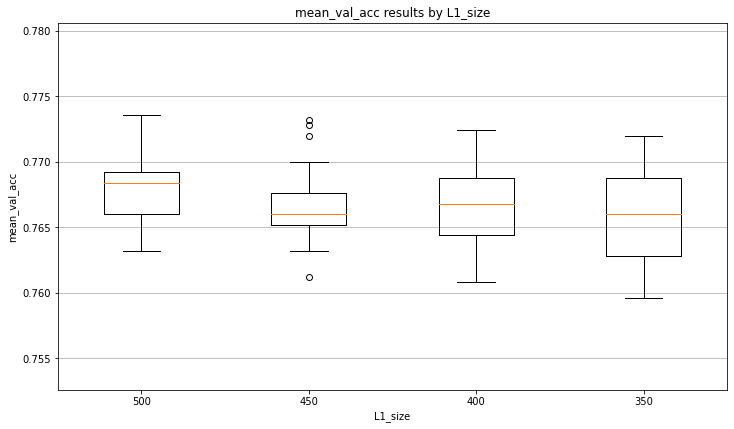

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


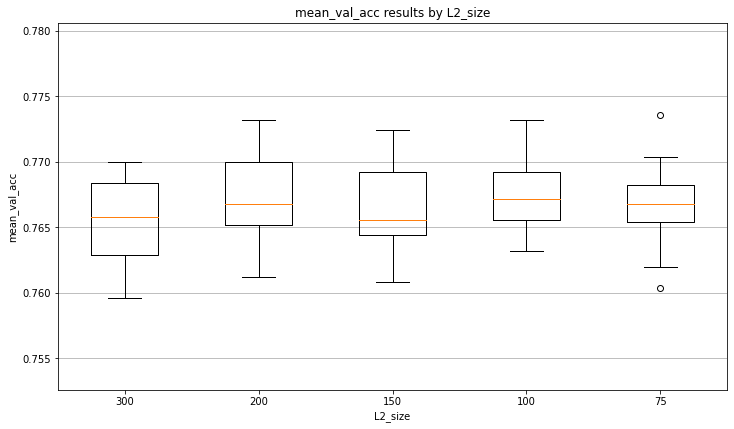

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


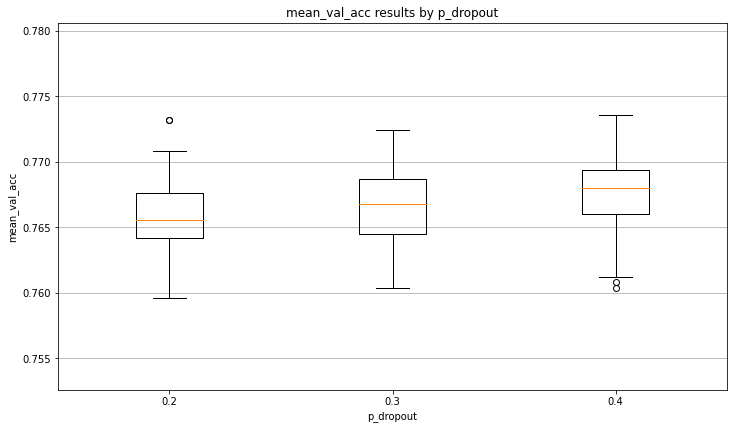

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


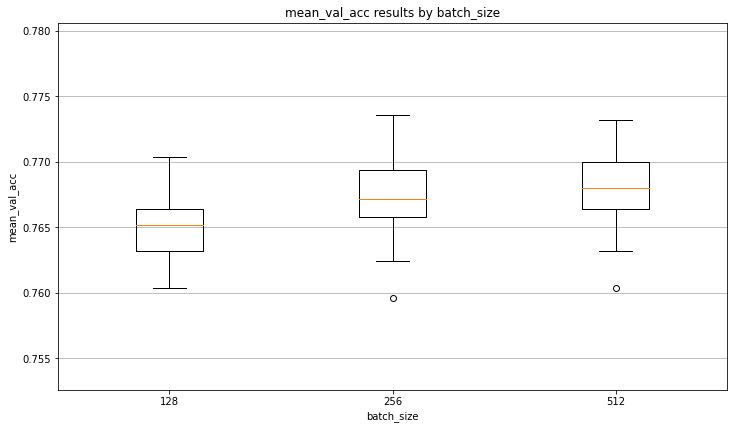

In [ ]:
plotResultsByParameter(search_results, params, params2plot=['L1_size', 'L2_size', 'p_dropout', 'batch_size'])

# Task AB experiments

In [ ]:
import pickle

with open('./Results/SNN/SNN_TASK_AB_SEARCH_2.df', 'rb') as filehandle:
  search_results = pickle.load(filehandle)

In [ ]:
search_results.sort_values(by='mean_val_acc', ascending=False).head(10)

,L1_size,L2_size,activation,p_dropout,batch_size,optimizer,max_epochs2best,min_epochs2best,mean_loss,mean_val_loss,mean_acc,mean_val_acc,mean_final_acc,mean_final_val_acc
8,500,175,relu,0.35,512,rmsprop,66,34,0.255432,0.873335,0.90990,0.7740,0.94532,0.73424
14,500,225,relu,0.45,512,rmsprop,51,26,0.316292,0.874424,0.88835,0.7732,0.93953,0.72920
5,500,100,relu,0.35,512,rmsprop,69,23,0.391870,0.853923,0.85020,0.7732,0.92689,0.71688
26,500,225,relu,0.35,512,rmsprop,66,39,0.239924,0.899776,0.91950,0.7728,0.94777,0.72232
9,500,125,relu,0.40,256,rmsprop,50,13,0.381119,0.843760,0.85715,0.7728,0.96632,0.72000
6,500,100,relu,0.45,512,rmsprop,60,29,0.450301,0.774957,0.82610,0.7728,0.91255,0.73752
3,500,125,relu,0.40,512,rmsprop,55,27,0.404266,0.763832,0.84325,0.7712,0.93431,0.72632
21,500,125,relu,0.35,512,rmsprop,63,53,0.287689,0.932849,0.89635,0.7708,0.93563,0.73024
28,500,200,relu,0.40,512,rmsprop,62,26,0.259026,0.855180,0.90275,0.7708,0.94670,0.73048
11,500,175,relu,0.45,256,rmsprop,67,22,0.228643,1.073150,0.92245,0.7704,0.96875,0.73400


In [ ]:
search_results.shape

(30, 14)

In [ ]:
from itertools import product

params = {
    'L1_size': [500],                    
    'L2_size': [225, 200, 175, 125, 100],                
    'activation':['relu'],                                    
    'p_dropout': [0.35, 0.40, 0.45],                 
    'batch_size': [256, 512],                 
    'optimizer':['rmsprop']                                    
}

# define the search space
search_space = list(product(*params.values()))
# take only those configurations wher L1_size >= L2_size
search_space = [conf for conf in search_space if conf[0] > conf[1]]

print('{} permutations in the search space.'.format(len(search_space)))

30 permutations in the search space.


## Results by parameters

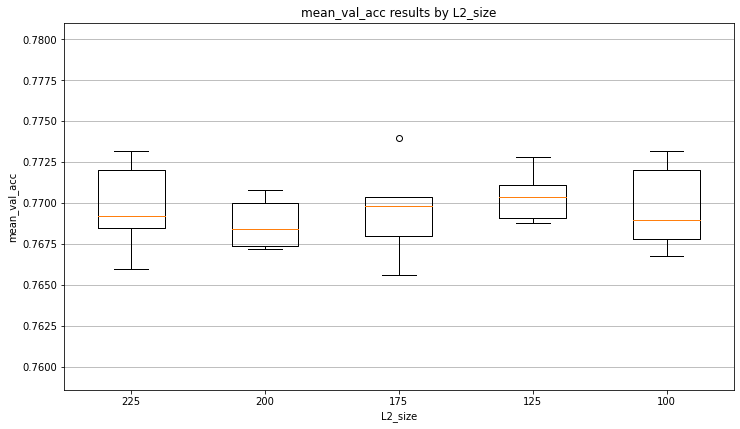

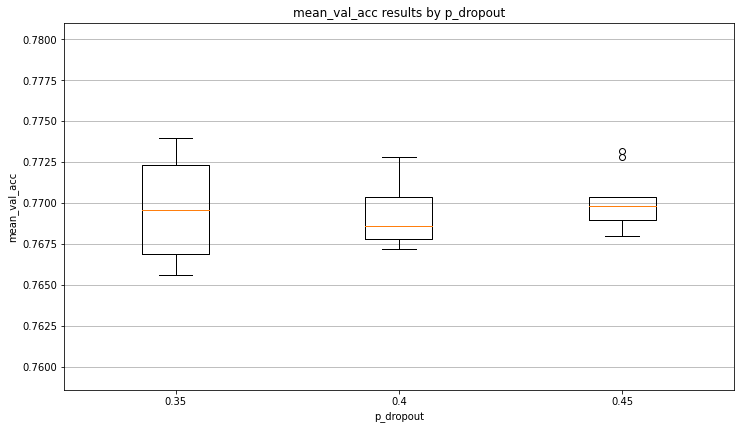

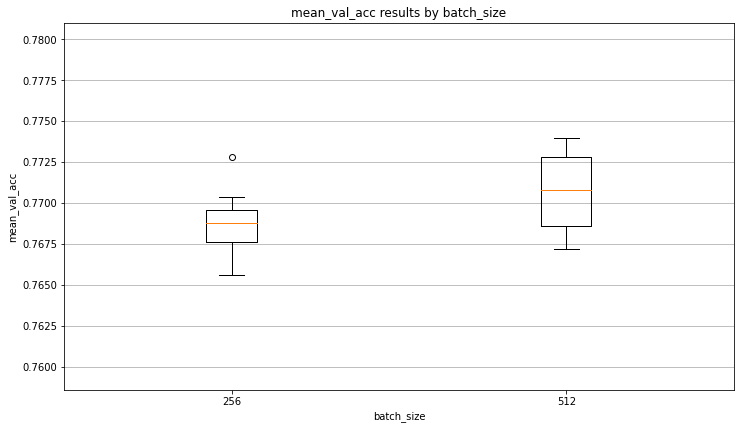

In [ ]:
plotResultsByParameter(search_results, params, params2plot=['L2_size', 'p_dropout', 'batch_size'])

# Resources

* Mini batch size selection: [1](https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch), [2](https://www.quora.com/In-deep-learning-why-dont-we-use-the-whole-training-set-to-compute-the-gradient), [3](https://stats.stackexchange.com/questions/164876/what-is-the-trade-off-between-batch-size-and-number-of-iterations-to-train-a-neu)
* Optimizers: [1](https://ai.stackexchange.com/questions/18206/what-kind-of-optimizer-is-suggested-to-use-for-binary-classification-of-similar)
* RMSprop: [1](https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a)
* Number of Hidden Layers: [1](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw)

    
